In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

In [2]:
df = pd.read_excel('cycling_data.xlsx')

In [3]:
df.head()

,Date,Time(min),Time(sec),Average Speed,Distance(km),Av. Heart rate,Calories Burnt
0,2020-05-26,41,2,16.15,11.04,174,601
1,2020-05-27,49,43,13.79,11.42,172,707
2,2020-05-30,46,42,14.60,11.36,144,547
3,2020-06-01,39,43,16.35,10.81,165,545
4,2020-06-02,42,33,16.16,11.45,173,613


In [4]:
df.columns

Index(['Date', 'Time(min)', 'Time(sec)', 'Average Speed', 'Distance(km)',
       'Av. Heart rate', 'Calories Burnt'],
      dtype='object')

In [5]:
df['total_time'] = df['Time(min)'] + df['Time(sec)']/60

In [6]:
df.head()

,Date,Time(min),Time(sec),Average Speed,Distance(km),Av. Heart rate,Calories Burnt,total_time
0,2020-05-26,41,2,16.15,11.04,174,601,41.033333
1,2020-05-27,49,43,13.79,11.42,172,707,49.716667
2,2020-05-30,46,42,14.60,11.36,144,547,46.700000
3,2020-06-01,39,43,16.35,10.81,165,545,39.716667
4,2020-06-02,42,33,16.16,11.45,173,613,42.550000


In [7]:
cleaned_df = df[['Average Speed', 'Distance(km)',
       'Av. Heart rate','total_time', 'Calories Burnt']]

In [8]:
cleaned_df.head()

,Average Speed,Distance(km),Av. Heart rate,total_time,Calories Burnt
0,16.15,11.04,174,41.033333,601
1,13.79,11.42,172,49.716667,707
2,14.60,11.36,144,46.700000,547
3,16.35,10.81,165,39.716667,545
4,16.16,11.45,173,42.550000,613


In [9]:
correlation_df = cleaned_df.corr()

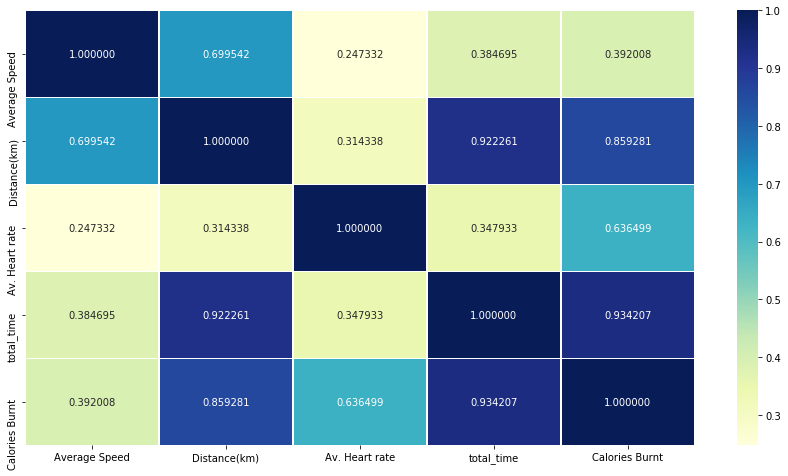

In [119]:
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_df, cmap="YlGnBu", linewidths=.5, annot=True, fmt='f')

In [11]:
cleaned_df.columns

Index(['Average Speed', 'Distance(km)', 'Av. Heart rate', 'total_time',
       'Calories Burnt'],
      dtype='object')

In [12]:
X = cleaned_df.drop('Calories Burnt', axis=1)
y = cleaned_df['Calories Burnt']

In [13]:
X.head()

,Average Speed,Distance(km),Av. Heart rate,total_time
0,16.15,11.04,174,41.033333
1,13.79,11.42,172,49.716667
2,14.60,11.36,144,46.700000
3,16.35,10.81,165,39.716667
4,16.16,11.45,173,42.550000


In [14]:
y.head()

0    601
1    707
2    547
3    545
4    613
Name: Calories Burnt, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
type(y_train)

pandas.core.series.Series

In [32]:
X_train[0:5]

,Average Speed,Distance(km),Av. Heart rate,total_time
12,18.33,15.03,168,49.200000
4,16.16,11.45,173,42.550000
37,14.14,4.32,112,18.383333
8,16.63,10.90,170,39.366667
3,16.35,10.81,165,39.716667


In [33]:
svm_reg = svm.SVR()
rfr_reg = RandomForestRegressor()
dt_reg = DecisionTreeRegressor()
lasso_reg = LassoCV()
elastic_reg = ElasticNetCV()

In [34]:
svm_reg.fit(X_train, y_train.ravel())
rfr_reg.fit(X_train, y_train.ravel())
dt_reg.fit(X_train, y_train.ravel())
lasso_reg.fit(X_train, y_train.ravel())
elastic_reg.fit(X_train, y_train.ravel())

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [35]:
y_pred_svm = svm_reg.predict(X_test)
y_pred_rfr = rfr_reg.predict(X_test)
y_pred_dt = dt_reg.predict(X_test)
y_pred_lasso = lasso_reg.predict(X_test)
y_pred_elastic = elastic_reg.predict(X_test)

In [36]:
results_dict = dict()

In [68]:
def make_pred_dict(results_dict, y_test, y_pred, type):
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    
    temp_dict = dict()
    temp_dict['MAE'] = mae
    temp_dict['MSE'] = mse
    temp_dict['R2'] = r2
    
    results_dict[type] = temp_dict
    

In [69]:
make_pred_dict(results_dict, y_test, y_pred_svm, 'SVM')
make_pred_dict(results_dict, y_test, y_pred_rfr, 'RandomForest')
make_pred_dict(results_dict, y_test, y_pred_dt, 'DecisionTree')
make_pred_dict(results_dict, y_test, y_pred_lasso, 'LassoCV')
make_pred_dict(results_dict, y_test, y_pred_elastic, 'ElasticCV')

In [70]:
results_df = pd.DataFrame(results_dict)

In [85]:
results_df

,MAE,MSE,R2
SVM,63.045471,6542.788908,-0.065330
RandomForest,27.120000,1099.287900,0.821008
DecisionTree,32.300000,1255.900000,0.795508
LassoCV,7.798922,101.336582,0.983500
ElasticCV,7.659592,94.066550,0.984684


In [102]:
mae_df = results_df[['MAE']]

<Figure size 2880x1440 with 0 Axes>

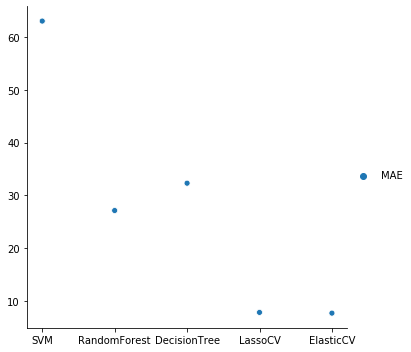

In [111]:
plt.figure(figsize=(40,20))
sns.relplot(data=mae_df, size='MAE', sizes=(10,100))

In [124]:
sample = np.array([20.81, 18.23, 163, 52.6])

In [127]:
elastic_reg.predict(sample.reshape(1, -1))

array([694.1865602])